In [70]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time

In [71]:
data = pd.read_csv("heart_2020_cleaned.csv")
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [72]:
data.replace("Yes", 1, inplace = True)
data.replace("No", 0, inplace = True)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


In [73]:
data['Diabetic'].unique()

array([1, 0, 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [74]:
data.replace("Yes (during pregnancy)", 1, inplace = True)
data.replace("No, borderline diabetes", 0, inplace = True)

In [75]:
data["Sex"].unique()

array(['Female', 'Male'], dtype=object)

In [76]:
data.replace("Female", 1, inplace = True)
data.replace("Male", 0, inplace = True)

In [77]:
data["AgeCategory"].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [78]:
data.replace("18-24", 0, inplace = True)
data.replace("25-29", 1, inplace = True)
data.replace("30-34", 2, inplace = True)
data.replace("35-39", 3, inplace = True)
data.replace("40-44", 4, inplace = True)
data.replace("45-49", 5, inplace = True)
data.replace("50-54", 6, inplace = True)
data.replace("55-59", 7, inplace = True)
data.replace("60-64", 8, inplace = True)
data.replace("65-69", 9, inplace = True)
data.replace("70-74", 10, inplace = True)
data.replace("75-79", 11, inplace = True)
data.replace("80 or older", 12, inplace = True)

In [79]:
data["Race"].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [80]:
data.replace("White", 0, inplace = True)
data.replace("Black", 1, inplace = True)
data.replace("Asian", 2, inplace = True)
data.replace("American Indian/Alaskan Native", 3, inplace = True)
data.replace("Hispanic", 4, inplace = True)
data.replace("Other", 5, inplace = True)

In [81]:
data["GenHealth"].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [82]:
data.replace("Poor", 0, inplace = True)
data.replace("Fair", 1, inplace = True)
data.replace("Good", 2, inplace = True)
data.replace("Very good", 3, inplace = True)
data.replace("Excellent", 4, inplace = True)

In [83]:
data.shape

(319795, 18)

In [84]:
#70% train, 30% test

319795 * 0.7

223856.5

In [85]:
train = data.iloc[:223856, :]
test = data.iloc[223856:, :]

In [89]:
train

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,7,0,1,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,12,0,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,9,0,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,11,0,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,4,0,0,1,3,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223851,0,34.28,1,0,1,30.0,10.0,1,1,8,0,1,0,1,4.0,1,0,0
223852,0,24.80,0,0,0,0.0,0.0,0,1,5,0,0,1,3,8.0,0,0,0
223853,0,25.75,0,0,0,0.0,0.0,0,1,8,0,0,1,3,8.0,1,0,0
223854,1,23.91,1,0,0,18.0,0.0,1,0,9,3,1,0,1,5.0,1,0,0


In [90]:
only_zero = train[train.Stroke == 0]

In [91]:
test_zero = test[test.Stroke == 0]
pred1 = model.predict(test_zero)
pred1

223856    0.329474
223857    0.207630
223858    0.287498
223859    0.294073
223861    0.208568
            ...   
319790    0.390558
319791    0.221048
319792    0.234012
319793    0.204887
319794    0.362163
Length: 92377, dtype: float64

In [92]:
pred1 = pred1.to_frame()
pred1['new'] = 0
pred1

,0,new
223856,0.329474,0
223857,0.207630,0
223858,0.287498,0
223859,0.294073,0
223861,0.208568,0
...,...,...
319790,0.390558,0
319791,0.221048,0
319792,0.234012,0
319793,0.204887,0


In [93]:
pred1.drop(0, axis=1, inplace=True)

In [94]:
pred1.rename(columns={'new': 0}, inplace=True)

In [95]:
pred1

,0
223856,0
223857,0
223858,0
223859,0
223861,0
...,...
319790,0
319791,0
319792,0
319793,0


In [96]:
not_zero = train[train.Stroke != 0]
test_not_zero = test[test.Stroke != 0]

In [97]:
not_zero

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,0,20.34,0,0,1,0.0,0.0,0,1,12,0,0,1,3,7.0,0,0,0
35,1,32.98,1,0,1,10.0,0.0,1,0,11,0,1,1,0,4.0,0,0,1
40,0,22.60,1,0,1,0.0,10.0,0,1,7,0,0,0,3,8.0,0,0,0
49,0,27.46,1,0,1,15.0,0.0,0,0,11,0,0,1,0,8.0,0,0,0
59,0,27.20,1,0,1,0.0,0.0,0,0,12,0,0,0,3,8.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223739,0,29.95,1,0,1,0.0,0.0,1,0,12,0,1,0,2,9.0,0,0,0
223761,0,26.96,0,0,1,0.0,0.0,0,0,12,0,0,1,3,7.0,0,0,1
223834,1,19.69,1,0,1,7.0,0.0,1,0,12,0,0,0,2,12.0,0,0,0
223842,0,32.28,0,0,1,2.0,0.0,0,1,8,0,0,0,3,6.0,1,0,0


In [98]:
model = sm.logit(formula = 'HeartDisease~AgeCategory+KidneyDisease+DiffWalking+BMI', data = not_zero).fit()

Optimization terminated successfully.
         Current function value: 0.635593
         Iterations 5


In [99]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:                 8507
Model:                          Logit   Df Residuals:                     8502
Method:                           MLE   Df Model:                            4
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                 0.02961
Time:                        12:38:55   Log-Likelihood:                -5407.0
converged:                       True   LL-Null:                       -5572.0
Covariance Type:            nonrobust   LLR p-value:                 3.615e-70
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.7001      0.148    -11.452      0.000      -1.991      -1.409
AgeCategory       0.0610      0.010      6.362      0.000       0.042       0.080
KidneyDisease     0.6835      0.068     10.022      0.000       0.550       0.817
DiffWalking       0.5304      0.047     11.262      0.000       0.438       0.623
BMI               0.0086      0.004      2.431      0.015       0.002       0.016
=================================================================================
"""

In [100]:
pred2 = model.predict(not_zero)
pred2 = model.predict(test_not_zero)
pred2 = pred2.to_frame()
pred2

,0
223860,0.289083
223871,0.238494
223903,0.376576
223910,0.284714
223955,0.561274
...,...
319588,0.368217
319619,0.599210
319620,0.529563
319740,0.271526


In [101]:
pred2.loc[pred2[0] <= 0.4, 'pred'] = 'false' 
pred2.loc[pred2[0] > 0.4, 'pred'] = 'true'
map = {'false':0, 'true':1}
pred2 = pred2.applymap(lambda x: map.get(x) if x in map else x)
pred2.drop(0, axis=1, inplace=True)
pred2.rename(columns={'pred': 0}, inplace=True)
pred2

,0
223860,0
223871,0
223903,0
223910,0
223955,1
...,...
319588,0
319619,1
319620,1
319740,0


In [102]:
pred = pd.concat([pred1, pred2])
pred.index.name = "Id"
pred = pred.sort_values("Id")
pred.index = np.arange(0, 95939)
pred.index.name = "Id"
pred.columns=["Category"]
pred

,Category
Id,
0,0
1,0
2,0
3,0
4,0
...,...
95934,0
95935,0
95936,0


In [103]:
from sklearn.metrics import roc_curve, auc
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))
    return pred_values

In [104]:
confusion_matrix_data(train,train.HeartDisease,model,0.5)

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'AgeCategory' is not defined
    HeartDisease~AgeCategory+KidneyDisease+DiffWalking+BMI
                 ^^^^^^^^^^^

Classification accuracy = 36.3%
Precision = 36.3%
TPR or Recall = 100.0%
FNR = 0.0%
FPR = 100.0%
ROC-AUC = 61.4%


1         0.311703
35        0.446752
40        0.253910
49        0.311785
59        0.324539
            ...   
223739    0.455393
223761    0.324085
223834    0.433544
223842    0.282251
223851    0.404752
Length: 8507, dtype: float64

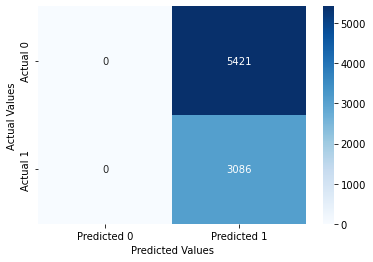

In [117]:
confusion_matrix_data(not_zero,not_zero.HeartDisease,model,0.1)

In [108]:
model2 = sm.logit(formula = 'HeartDisease~Stroke', data = only_zero).fit()

Optimization terminated successfully.
         Current function value: 0.265904
         Iterations 6


LinAlgError: Singular matrix

In [110]:
def confusion_matrix_test(pred_values,actual_values,cutoff=0.3):
    bins=np.array([0,cutoff,1])
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))

In [112]:
confusion_matrix_test(pred, train.HeartDisease, cutoff=0.4)

ValueError: The dimension of bins must be equal to the dimension of the  sample x.

In [116]:
not_zero

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,0,20.34,0,0,1,0.0,0.0,0,1,12,0,0,1,3,7.0,0,0,0
35,1,32.98,1,0,1,10.0,0.0,1,0,11,0,1,1,0,4.0,0,0,1
40,0,22.60,1,0,1,0.0,10.0,0,1,7,0,0,0,3,8.0,0,0,0
49,0,27.46,1,0,1,15.0,0.0,0,0,11,0,0,1,0,8.0,0,0,0
59,0,27.20,1,0,1,0.0,0.0,0,0,12,0,0,0,3,8.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223739,0,29.95,1,0,1,0.0,0.0,1,0,12,0,1,0,2,9.0,0,0,0
223761,0,26.96,0,0,1,0.0,0.0,0,0,12,0,0,1,3,7.0,0,0,1
223834,1,19.69,1,0,1,7.0,0.0,1,0,12,0,0,0,2,12.0,0,0,0
223842,0,32.28,0,0,1,2.0,0.0,0,1,8,0,0,0,3,6.0,1,0,0


In [114]:
pred

,Category
Id,
0,0
1,0
2,0
3,0
4,0
...,...
95934,0
95935,0
95936,0


## K-Nearest Neighbors Random Forest

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [124]:
X = train[['AgeCategory','BMI', 'Smoking', 'AlcoholDrinking','Stroke','PhysicalHealth','MentalHealth','DiffWalking','PhysicalActivity','SleepTime','Asthma','KidneyDisease','SkinCancer']]
X_test = test[['AgeCategory','BMI', 'Smoking', 'AlcoholDrinking','Stroke','PhysicalHealth','MentalHealth','DiffWalking','PhysicalActivity','SleepTime','Asthma','KidneyDisease','SkinCancer']]

In [126]:
k_classifier = KNeighborsClassifier()
k_classifier.fit(X, train.HeartDisease)
k_y_predict = k_classifier.predict(X_test)

Classification accuracy = 90.8%


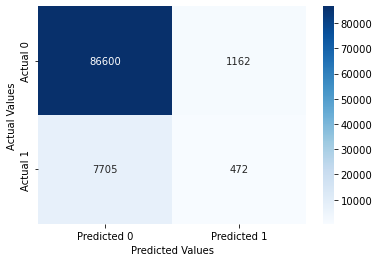

In [129]:
confusion_matrix_test(k_y_predict, test.HeartDisease, cutoff=0.2)

In [136]:
clf = RandomForestClassifier(n_estimators = 10)
clf.fit(X, train.HeartDisease)
clf_y_predict = clf.predict(X_test)

Classification accuracy = 89.8%


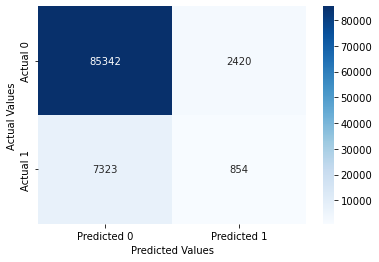

In [138]:
confusion_matrix_test(clf_y_predict, test.HeartDisease, cutoff=0.8)